# Machine Learning - Final project

Autores: 

# Objetivo: Predicción de la potencial peligrosidad de asteroides.

## Selección y descripción de los datos y el problema.

Descripción breve del dataset, variables y contexto del problema.

- Origen del dataset  y características principales (features)

Los datos utilizados a continuación son una recopilación de datos correspondientes a diversas características que poseen los asteroides. Estos datos pertenecen y son almacenados por el Laboratorio de Propulsión a Chorro del Instituto Tecnológico de California (CTI, por sus siglas en ingles), que forma parte de la NASA.

Se trata de una base de datos pública que compila parámetros orbitales y físicos de objetos pequeños del sistema solar utilizado para estudiar la dinámica orbital de asteroides y estudios de riesgos de impacto de estos cuerpos circunavegantes.

Para este caso, el dataset consta de 45 columnas con información relacionada a los asteroides. De todas ellas, las más relevantes son:

Identificación y flags

- NEO: flag de Near-Earth-Object (Y/N) clasificación de cercanía a la tierra.

- PHA: flag de Potentially Hazardous Asteroid (Y/N) clasificación de potencialmente peligroso.

- class: clasificación de la categoría del asteroide

Propiedades físicas

- H: magnitud absoluta (brillo intrínseco).

- diameter: diámetro efectivo (km)

- diamenter_sigma: incertidumbre asociada

Parámetros orbitales

- MOID: Minimum Orbit Intersection Distance i.e., distancia minima de intersección con la órbita terrestre

- e: excentricidad orbital

- a: semieje mayor (au)

- q: perihelio (au)

- I: inclination orbital (grados)

- tp: tiempo de paso por el perihelio

- per, per_y: periodo orbital

- Contexto del problema y el objetivo (label) del análisis

En base a los datos que componen el dataset, buscaremos identificar mediante diversos algoritmos de Machine Learning (ML) los asteroides potencialmente peligrosos para la tierra (PHA). Para realizar esto se utilizarán diversas características que representan una dependencia con esta etiqueta. Ellas son la excentricidad (e), semieje mayor (a), la distancia al perihelio (q), su magnitud absoluta (H) y el diámetro del asteroide (diameter). Mientras que el resto de las características mostradas funcionarán para estudiar como estas podrían tener una relación con la potencialidad peligrosidad.

- ¿Este problema es de clasificación (etiquetar categorías) o de
regresión (predecir valores continuos)?

En este caso, como buscamos predecir si un asteroide es potencialmente peligroso para la tierra (PHA), buscamos en esencia categorizar el asteroide según esta variable. Por lo tanto, corresponde a un problema de clasificación binaria. De esta manera el objetivo es predecir si un asteroide es un Near-Earth Object (neo=Y) a partir de sus propiedades físicas y parámetros orbitales.

De esta manera, las labels a utilizar corresponde a las columnas NEO y PHA, mientras que el resto de columnas numéricas (como MOID, a, e, i, tp, etc) se utilizarán como features. Se descartan campos puramente identificadores (como id, name, etc) debido a la poca relevancia dentro del estudio buscado, así como también aquellas columnas derivadas del flag class (cuando codifica explícitamente NEOs) para evitar fugas de información denominadas data leakage.

El problema a desarrollar cobra importancia científica debido a

- Los NEOs tienen órbitas que cruzan o se acercan a la tierra de manera anómala.

- Modelos que aprendan a distinguir y diferenciar NEOs a partir de parámetros observables (orbitales y físicos) pueden complementar métodos dinámicos clásicos, simulaciones numéricas e implementar herramientas para priorizar seguimiento y eventual riesgo real.

## Exploración de datos y pre-procesamientos

In [1]:
!pip install imbalanced-learn
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 170.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 28.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 126.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importamos las librerias a utilizar
import numpy as np # análisis numérico
import pandas as pd # procesamiento de datos
import matplotlib.pyplot as plt # visualización de datos
import seaborn as sns # visualización de datos

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, roc_curve, auc
from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, StratifiedKFold, GridSearchCV


In [4]:
# Emplear el siguiente código para descargar por primera vez el documento a trabajar
'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakhawat18/asteroid-dataset")

print("Path to dataset files:", path)
'''

# Si se tiene descargado el archivo en el mismo directorio del código
path = "Dataset_fp.csv"
df = pd.read_csv(path)

/tmp/ipykernel_118/145326793.py:13: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [5]:
# Primeras filas del Dataset
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [6]:
# Resumen completo del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [7]:
# Cantidad de filas y columnas
df.shape

(958524, 45)

Observamos aproximadamente 958.000 instancias (asteroides) y 45 columnas con los parámetros medidos.

In [8]:
# Cantidad de datos faltantes por fila
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [9]:
df.duplicated().sum() # Verificamos si hay datos duplicados

0

In [10]:
#Limpiamos los datos de la columna de nuestro interes, en este caso 'pha'
df_nuevo = df.dropna(subset=['pha'])
print(df_nuevo.shape)

(938603, 45)


In [11]:
#Eliminamos las columnas que le faltan datos y no son relevantes para el proyecto con el fin de achicar el dataset
col_extra = ['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'orbit_id', 'epoch_cal', 'equinox', 'tp_cal']
df_nuevo = df_nuevo.drop(columns=col_extra)
print(df_nuevo.shape)

(938603, 35)


In [12]:
#Debemos separar las columnas entre las que estan compuestas por números y categorias (palabras), para poder limpiar los datos que faltan.
numeros = ['H', 'diameter', 'e', 'a', 'q', 'i', 'moid', 'epoch', 'epoch_mjd', 'albedo', 'diameter_sigma',
                  'om', 'w', 'ma', 'ad', 'n', 'tp', 'per', 'per_y', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q',
                  'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
palabras = ['neo', 'class']

for col in numeros:
    df_nuevo[col] = df_nuevo[col].fillna(df_nuevo[col].median())

for col in palabras:
    df_nuevo[col] = df_nuevo[col].fillna(df_nuevo[col].mode()[0])

print(df_nuevo.isnull().sum()) #Para ver si quedo algun valor nulo
print(df_nuevo.shape) #Para ver el tamaño del dataset
print(df_nuevo.info()) #Para ver si todas las columnas tienen la misma cantidad de información

neo               0
pha               0
H                 0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64
(938603, 35)
<class 'pandas.core.frame.DataFrame'>
Index: 938603 entries, 0 to 958523
Data columns (total 35 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             938603 non-null  object 
 1   pha             938603 no

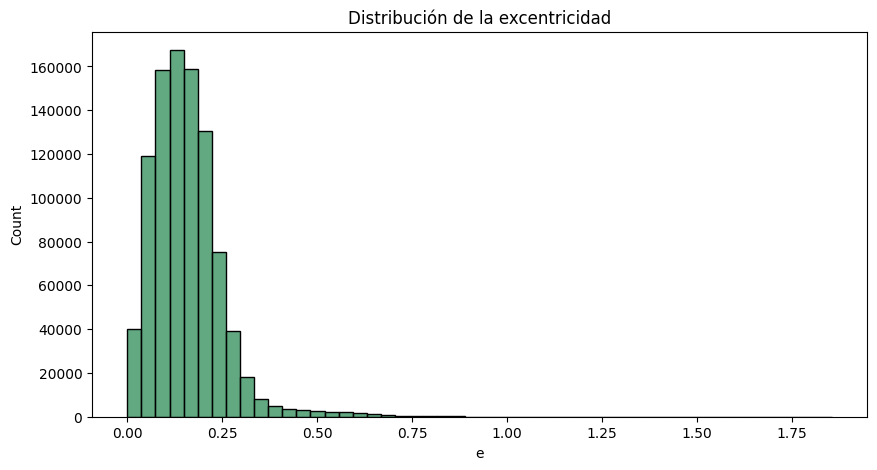

In [13]:
#Distribución de la excentricidad
plt.figure(figsize=(10,5))
ax = sns.histplot(df_nuevo['e'], bins = 50, kde=False, color = 'seagreen')
plt.title('Distribución de la excentricidad')
plt.savefig('Dist_e.png', dpi = 600)
plt.show()


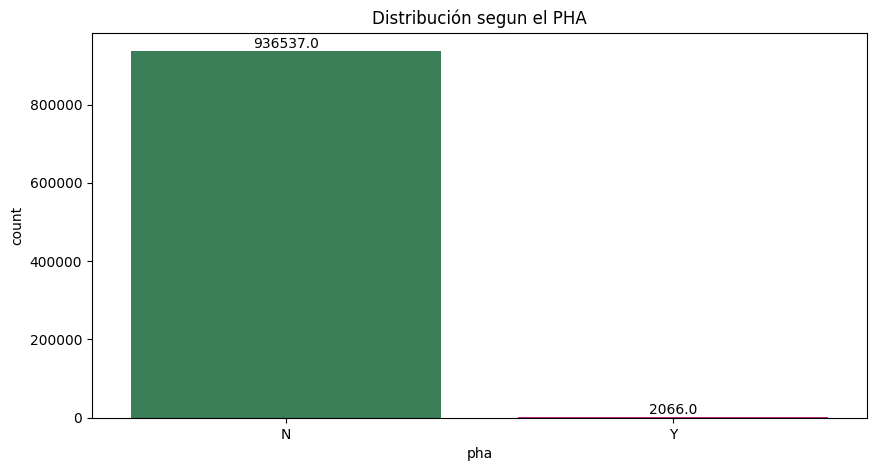

In [14]:
#Distribución de la categoría de peligrosidad
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_nuevo, x='pha', hue='pha', palette=['seagreen', 'mediumvioletred'], legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(height),
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom'
    )
plt.title('Distribución segun el PHA')
plt.savefig('Dist_PHA.png', dpi = 600)
plt.show()


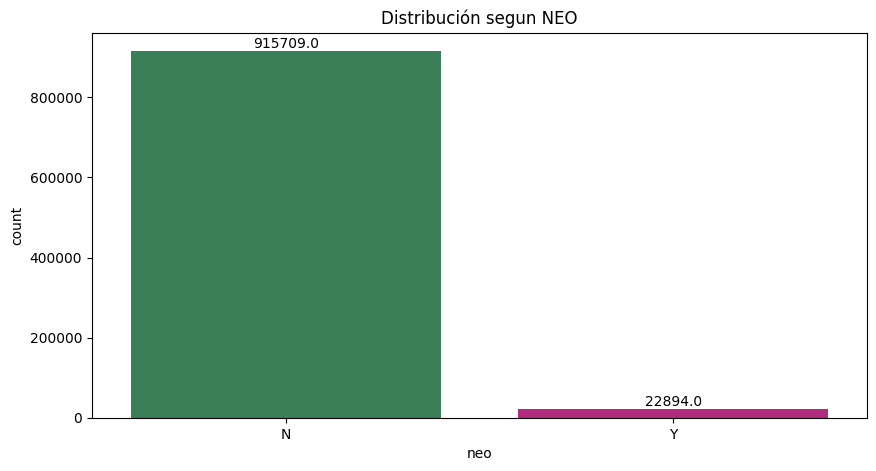

In [15]:
#Distribución de la categoria cercanos a la tierra
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df_nuevo, x='neo', hue='neo', palette=['seagreen', 'mediumvioletred'], legend=False)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        str(height),
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom'
    )
plt.title('Distribución segun NEO')
plt.savefig('dist_NEO.png', dpi = 600)
plt.show()


In [16]:
# Porcentajes
porcentaje = df['neo'].value_counts(normalize=True) * 100
porcentaje_pha = df['pha'].value_counts(normalize=True) * 100

print("\nPorcentajes de NEO:")
print(porcentaje)
print("\nPorcentajes de PHA:")
print(porcentaje_pha)



Porcentajes de NEO:
neo
N    97.611422
Y     2.388578
Name: proportion, dtype: float64

Porcentajes de PHA:
pha
N    99.779886
Y     0.220114
Name: proportion, dtype: float64


### Comentarios

Podemos observar un desbalance brutal entre los parámetros de PHA y NEO para los cuales

- PHA se conoce un x%

- NEO se conoce un x%

lo cual convierte este problema en un caso típico de clases desbalanceadas. Esto impacta directamente al tipo de métrica que resuelta al trabajar con muestras no representativas.

El problema se centra en la no generalización de los datos al presentar un balance crítico. Así, el estudio y comportamientos a observar no serán representativos para poder establecer una correlación real y certera de los parámetros con las etiquetas. 

### Distribuciones univariadas

In [17]:
# Cargar dataset
df = df_nuevo

# Convertir NEO a binario
df['neo_bin'] = df['neo'].map({'Y': 1, 'N': 0})

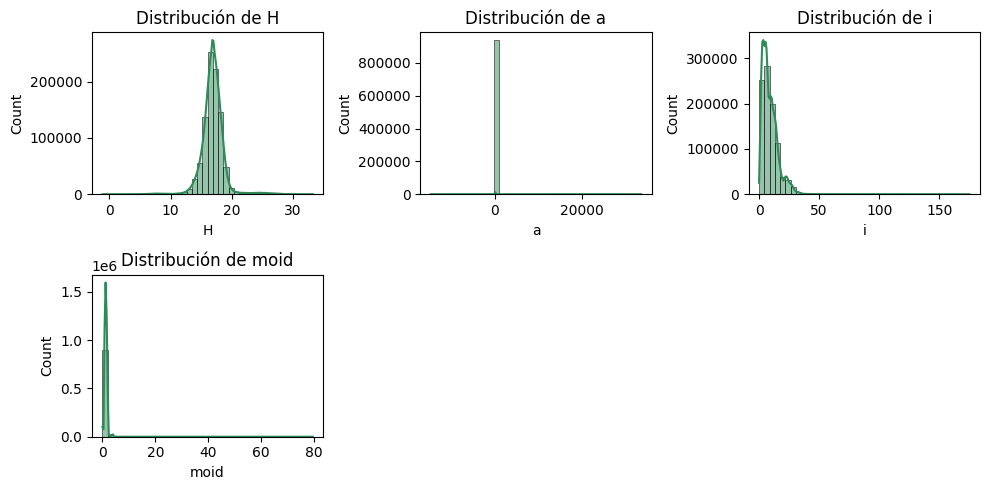

In [18]:
variables = ['H', 'a', 'i', 'moid']

plt.figure(figsize=(10,5))
for idx, var in enumerate(variables, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(df[var].dropna(), kde=True, bins=40, color = 'seagreen')
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
plt.tight_layout()
plt.savefig('Dist_1.png', dpi = 600)
plt.show()


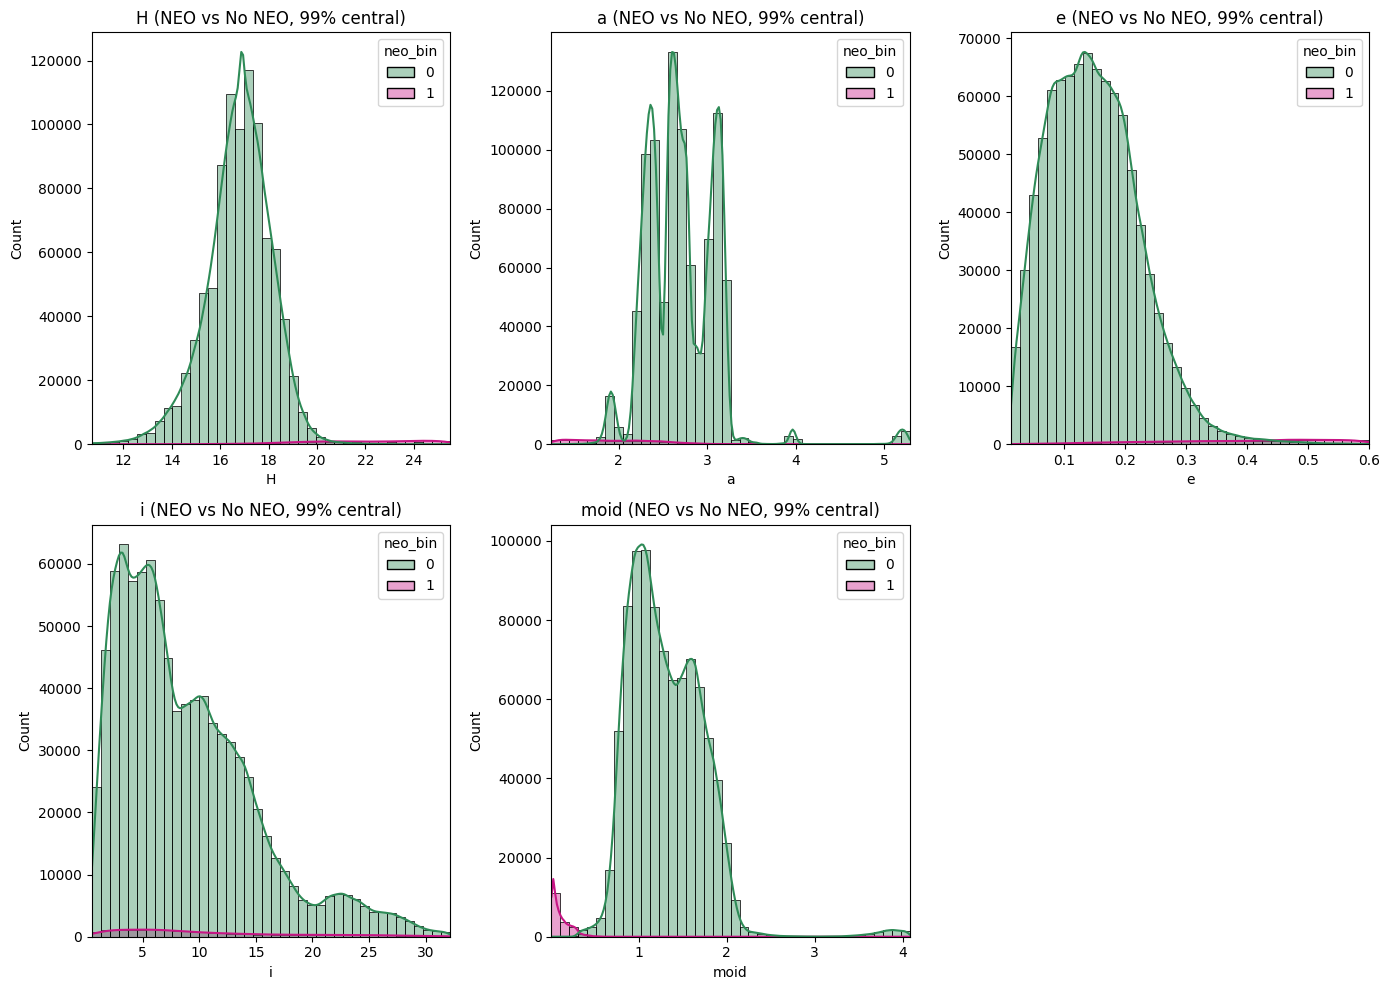

In [19]:
def limits(df, col, p=0.99):
    low = df[col].quantile((1-p)/2)
    high = df[col].quantile(1 - (1-p)/2)
    return low, high

variables = ['H', 'a', 'e', 'i', 'moid']

plt.figure(figsize=(14, 10))

for idx, var in enumerate(variables, 1):
    low, high = limits(df, var, p=0.99)
    
    # Filtrar al 99% más denso PARA ESA VARIABLE
    df_filt = df[(df[var] >= low) & (df[var] <= high)]
    
    plt.subplot(2, 3, idx)
    sns.histplot(
        data=df_filt,
        x=var,
        hue='neo_bin',
        kde=True,
        bins=40,
        palette=['seagreen', 'mediumvioletred'],
        alpha=0.4
    )
    plt.xlim(low, high)
    plt.title(f"{var} (NEO vs No NEO, 99% central)")
    plt.xlabel(var)

plt.tight_layout()
plt.savefig('neo_o_no.png', dpi = 600)
plt.show()


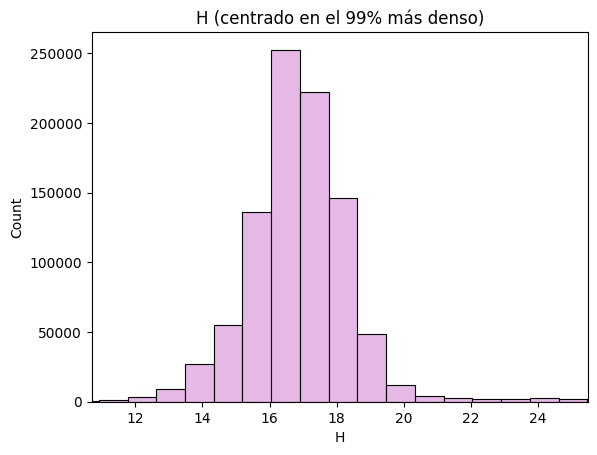

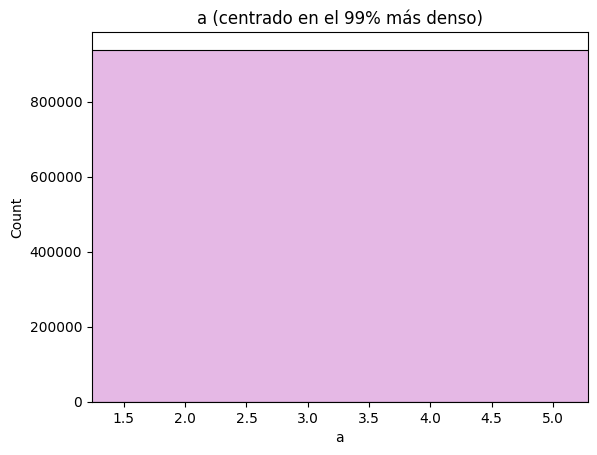

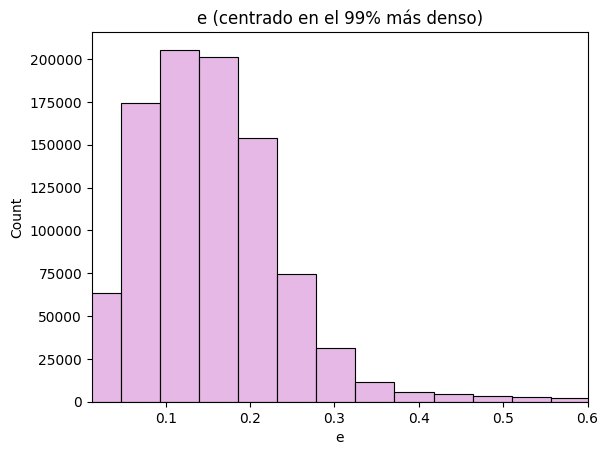

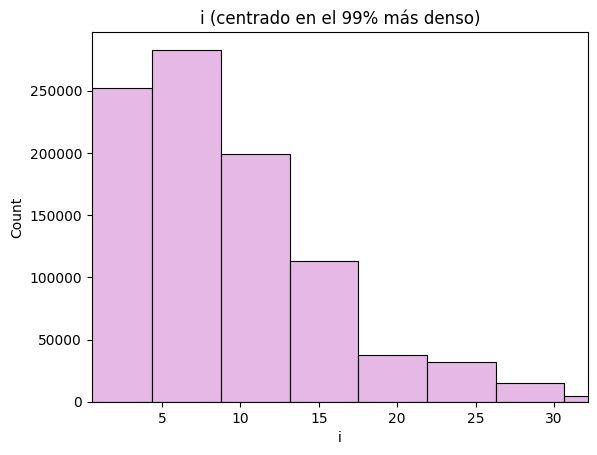

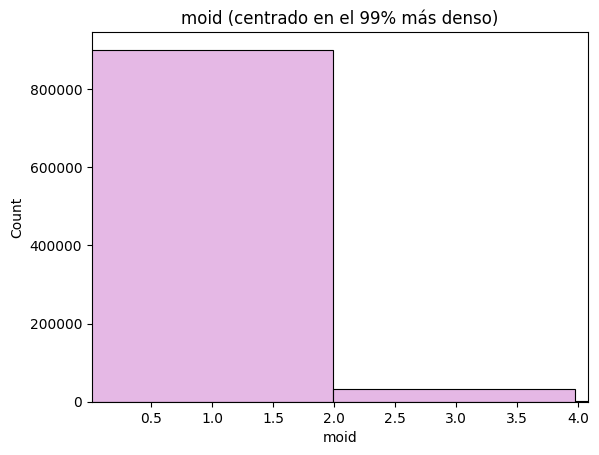

In [20]:
def limits(df, col, p=0.99):
    low = df[col].quantile((1-p)/2)
    high = df[col].quantile(1 - (1-p)/2)
    return low, high

for col in ['H', 'a', 'e', 'i', 'moid']:
    low, high = limits(df, col, p=0.99)
    sns.histplot(df[col], bins=40, color = 'plum')
    plt.xlim(low, high)
    plt.title(f"{col} (centrado en el 99% más denso)")
    plt.savefig(f"{col}_99.png", dpi = 600)
    plt.show()
    

### Comentarios y análisis de gráficos

Magnitude Absoluta

- La distribución es unimodal con carácter gaussiano en su dominio centrado en magnitudes entre 15.5 y 17.7

- La gran mayoría de los objetos dentro del data set tiene magnitudes absolutas relativamente altas lo cual implica que son objetos pequeños y poco reflectantes.

- A magnitudes mayores a 20 se logra captar un decaimiento suave hacia asteroides pequeños difícilmente observables. 

- La distribución detectada se asimila a la función de luminosidad esperada de asteroides: el máximo se concentra en el volumen detectable.

- Incluso realizando el análisis para el 99% de la muestra no se esperan ver objetos extremadamente brillantes (menos a 10) ya que son escasos y, para objetivo de este estudio, se considerarían outlayres.

Semite mayor (a)

- La distribución aparece cargada alrededor de valores entre 1.8 y 3.4 UA.

- Podemos identificar directamente esta región al cinturón principal de asteroides el cual se ubicar entre la órbita de Marte y Júpiter entre 2 y 3.6 UA desde el Sol.

- La densidad de esta región es enorme comparada con cualquier otra zona lo cual ocasiona la saturación en una única imagen del dominio.

Excentricidad (e)

- La distribución es asimétrica marcando una mayor concentración entre 0.1 y 0.2 y luego una caída suave desde 0.3

- Cabe destacar que el 99% más denso de la muestra elimina casi todos los objetos con excentricidades altas (mayor a 0.6) ya que típicamente se relacionan a cometas o NEOs con perturbaciones anómalas.

Inclinación (i)

- Clara distribución asimétrica con máximos en 2° y 10° decreciendo hacia valores de 20-30°.

- Asimismo, la cola para valores elevados de inclinación es menos pronunciada lo cual calza con la distribución de asteroides en el cinturón respecto a la estabilidad secular de la región.

- El filtrado dejó fuera órtitas retrógradas y casos extremos de inclinación. 

MOID

- A diferencia de la distribución simétrica y antisiétrica de los parámetros anteriores, el comportamiento no se observa con un cambio suave en su dominio.

- Hay una carga excesiva en el primer bin con una caída abrupta hacia MOIDs mayores.

- Recordemos que el MOID mide la distancia mínima entre las órbitas del asteroide y la Tierra. la mayor densidad del cinturón de asteroides tienen este parámetros con varias unidades astronómicas, pero debido al filtrado se centra el rango visual en órbitas que están relativamente más próximas a la órbita terrestre incluso sin ser NEOs.

- Esto genera un gráfico altamente sesgado a la izquierda.

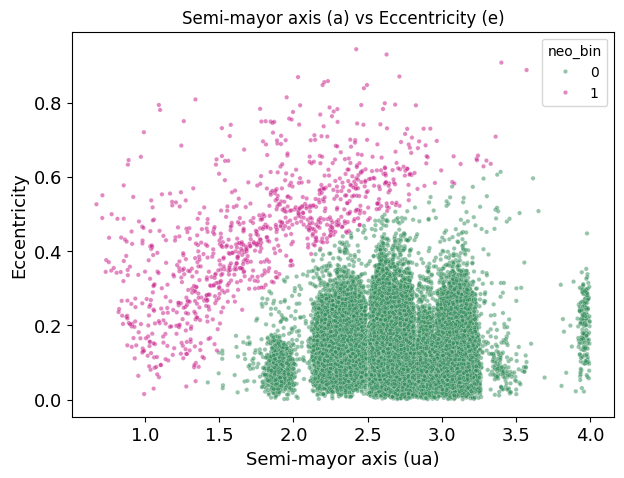

In [21]:
df_filt = df[
    (df['a'].between(0.5, 4.0)) &    # región dominante
    (df['e'].between(0, 1))          # órbitas elípticas
]

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_filt.sample(40000),
    x='a', y='e',
    palette=['seagreen', 'mediumvioletred'],
    hue='neo_bin', s=10, alpha=0.5
)
plt.title("Semi-mayor axis (a) vs Eccentricity (e)")
plt.xlabel("Semi-mayor axis (ua)", fontsize=13)
plt.ylabel("Eccentricity", fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.savefig('a_vs_e.png', dpi = 600)
plt.show()


### Comentario de estructura global y población 

El scatter plot muestra la relación entre el semeje mayor (a) y la excentricidad (e) en un rango razonable de 0.5<a<4.0 y 0<e<1. Notar que la leyenda indica 0 (verde) para la clasificación Not NEO y 1 (rosado) para NEO.

El filtrado elimino outliers extremos lo cual revela la estructura orbital real de las dos poblaciones.

Población para Not NEO (verde)

Según el semi eje mayor

- Nube concentrada entre 2.0 y 3.2 UA con tres agrupaciones verticales visibles.

- Estas agrupaciones corresponden directamente con el Cinturón Principal de Asteroides dividido en subsanadas por resonancias con Júpiter.

- Vacío cerca de 2.5 UA, 2.82 UA y 3.27 UA

- Estas columnas y huecos son las famosas brechas de Kirkwood.

Según la excentricidad

- Concentración entre 0.0 y 0.25

- Ligeramente excéntricas

- Dinámicas estables

Población para  NEO (rosado)

Según el semi eje mayor

- Ocupan una región entre 0.5 UA y 2.0 UA

- Objetos Apolo: a>1 cruzan la órbita terrestre

- Objetos Amor: a>1 se acercan a la Tierra pero no la cruzan

- Objetos Atón: a<1 órbitas interiores, cruzan desde adentro.

- Esto coincide con la zona donde se encuentran la mayor de asteroides cercanos a la tierra.

Según la excentricidad

- Presenta valores más altos de excentricidad tal que 0.3<e<0.8

- Este comportamiento se espera para sistemas de dinámica perturbada por encuentros planetarios repetidos y migración orbital significativa.

- También se puede relacionar a dispersión caótica por resonancias de Júpiter, Saturno y efectos térmicos llamados efectos Yarkovsky.

Superposición

Entre los rangos de 1.8<a<2.0 y 0.2<e<0.4 se observa una regin donde NEO y Not NEO se mezclan parcialmente.

Resonancia

- Se observan excentricidades moderadas (e~0.3)

- Sin embargo no penetra la órbita terrestre.

Evolución

- Algunos objetos pueden ser clasificados como cuasi-NEO o pre-NEOs

- Es decir, están en el cinturón pero sus órbitas están erosionando por las resonancias entre otros planetas e.g., Júpiter

- Se estima (teóricamente) que en millones de años puedan transformar en NEOs detectables una vez que las perturbaciones modifiquen la dinámica del asteoride.

Filtro utilizado

Se eliminaron los outliers físicos que corresponden a JFC, objetos exóticos o bien te periodos orbitales mayores a 5 UA, centrándooslas en el rango de 0.5-4 UA.

- As, se revela la estructura del cinturón de asteorides.

- Las brechas d Kirkwood son visibles y notorias en la muestra.

- Este gráfico evidencia a priori la buenas herramientas para poder separar las clases utilizando Random Forest o bien XGBoost.

## Modelos de Machine Learning

Antes de iniciar con los modelos a utilizar, debemos separar nuestro sample en 2 grupos. Uno será destinado a ser el grupo de entrenamiento y el otro será el de prueba. Para esto tenemos lo siguiente:

In [22]:
#Transformamos de forma binaria las opciones para la categoría PHA
y = df_nuevo['pha'].map({'N': 0, 'Y': 1})
#Armamos nuestro features según las variables que nos importan informadas antes (H, a, q, e, diameter, neo, class)
chao_columnas = ['pha', 'epoch', 'epoch_mjd', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'diameter_sigma', 
                  'moid', 'moid_ld', 'albedo',  'rms' , 'class']
x = df_nuevo.drop(columns=chao_columnas)
x['neo'] = x['neo'].map({'Y': 1, 'N': 0})
x = x.fillna(0)

In [23]:

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=2)

In [24]:
Xtrain.shape, Xtest.shape

((703952, 16), (234651, 16))

In [25]:
ytrain.shape, ytest.shape

((703952,), (234651,))

### 1. Random Forest

- ¿Qué es? ¿Cómo funciona? ¿Qué hiperparámetros utiliza?

Corresponde a un algoritmo de aprendizaje supervisado que sirve para clasificar datos en base a un set de entrenamiento. Este algoritmo esta compuesto por diversos arboles de decisión, por lo que su capacidad de predicción es más precisa.

La clave para que esta predicción sea más precisa reside en la poca dependencia que puedan tener los arboles que componen el modelo entre sí. Esto quiere decir que mientras menos relacionadas se encuentren las características que compongan cada árbol, mayor será su asertividad (menor sesgo y sobreajuste).

Esta menor relación entre árboles se comprende en base al método que utiliza random forest para seleccionar las características. Este proceso, se realiza mediante una extensión del método bagging. Esto quiere decir que junta tanto la aleatoriedad de la selección y el agrupamiento de las características.

El modelo de forma técnica funciona mediante el ajuste de 3 hiperparámetros principales. La cantidad de árboles y características consideradas, además del tamaño del nodo. Los árboles que componen el algoritmo a su vez funcionan mediante el método de boostrapping. El cual va tomando una muestra del conjunto de entrenamiento con reemplazo. De esta muestra de entrenamiento, reserva una parte para realizar la prueba y con el resto embolsa características que entrega otro factor más de aleatoriedad. Posteriormente al ser un problema de clasificación, la decisión de la categoría recaerá en lo que predigan la mayoría de los árboles. Utilizando el conjunto apartado para realizarán la prueba y la predicción final.

- ¿Por qué utilizar este algoritmo?

El principal factor para considerar utilizar este algoritmo es la cantidad y la importancia de las diversas características que pueden influir en la predicción de la categoría. El contar con diversas categorías que pueden aportar información, solo utilizar arboles de decisión existe una probabilidad mayor de generar un sobreajuste. Mientras que al usar random forest esta posibilidad de sobreajuste disminuye.

- Implementación y resultados

In [26]:
recall_scorer_rf = make_scorer(recall_score)

rf_model = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=3,class_weight='balanced', n_jobs=-1)
rf_model.fit(Xtrain, ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
#Hiperparametros para random forest
importances = rf_model.feature_importances_
feature_names = x.columns
print(feature_names)
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

Index(['neo', 'H', 'diameter', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n',
       'tp', 'per', 'per_y', 'neo_bin'],
      dtype='object')
     Feature  Importance
5          q    0.339722
15   neo_bin    0.200241
3          e    0.130071
0        neo    0.101194
1          H    0.097794
13       per    0.046935
11         n    0.026702
14     per_y    0.025604
4          a    0.019127
10        ad    0.012259
6          i    0.000198
12        tp    0.000105
9         ma    0.000021
8          w    0.000013
2   diameter    0.000007
7         om    0.000007


In [28]:
#Matriz de confusión y curva ROC
rf_model.fit(Xtrain, ytrain)
pred_rf = rf_model.predict(Xtest)
prob_rf = rf_model.predict_proba(Xtest)[:, 1]
cm_rf = confusion_matrix(ytest, pred_rf)
roc_auc_rf = roc_auc_score(ytest, prob_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, prob_rf)



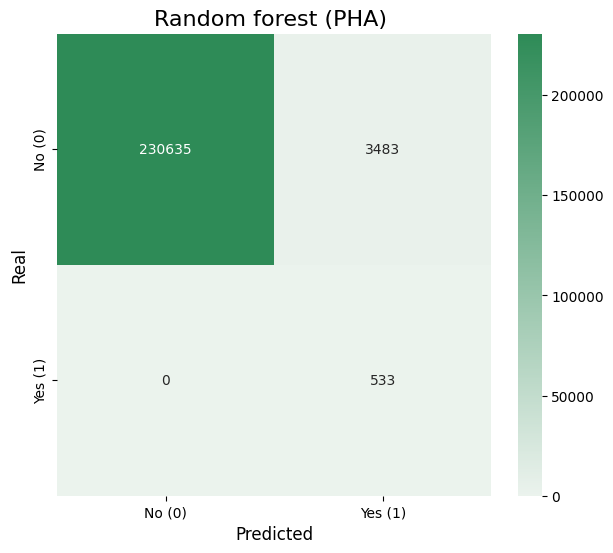

In [29]:
#Plot matriz de confusión
class_names = ['No (0)', 'Yes (1)']
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm_rf, 
    annot=True,              # Mostrar los valores numéricos
    fmt='d',                 # Formato entero (decimal)
    cmap=sns.light_palette("seagreen", as_cmap=True),            # Esquema de color
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.title('Random forest (PHA) ', fontsize=16)
plt.ylabel('Real', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.savefig('MC_rf.png', dpi = 600)
plt.show()


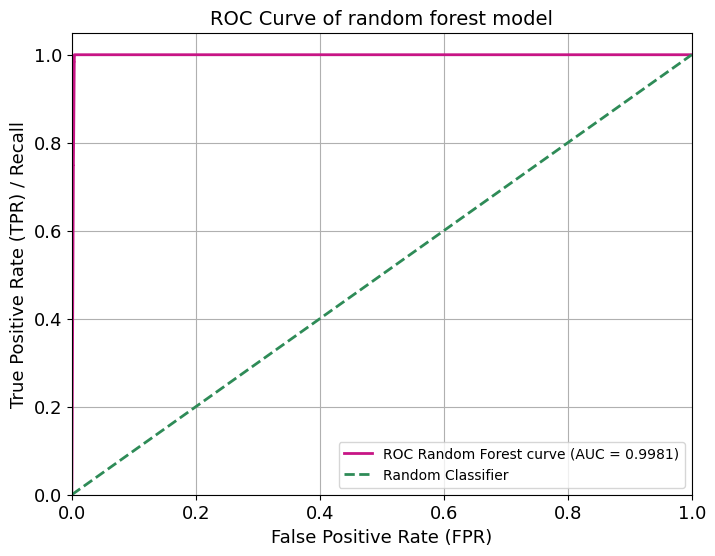

In [30]:
#Plot curva ROC
plt.figure(figsize=(8, 6))

# Trazar la Curva ROC del modelo XGBoost
plt.plot(
    fpr_rf, tpr_rf, color='mediumvioletred', 
    lw=2, 
    label=f'ROC Random Forest curve (AUC = {roc_auc_rf:.4f})'
)

# Trazar la línea de referencia (Clasificador Aleatorio)
plt.plot([0, 1], [0, 1], color='seagreen', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)',fontsize=13)
plt.ylabel('True Positive Rate (TPR) / Recall',fontsize=13)
plt.title('ROC Curve of random forest model', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('ROC_rf.png', dpi = 600)
plt.show() 


In [31]:
cv_rf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes_rf, train_scores_rf, validation_scores_rf = learning_curve(estimator=rf_model, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 5),
                                                            cv=cv_rf, scoring=recall_scorer_rf, n_jobs=-1)

train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
validation_scores_mean_rf = np.mean(validation_scores_rf, axis=1)
validation_scores_std_rf = np.std(validation_scores_rf, axis=1)

KeyboardInterrupt: 

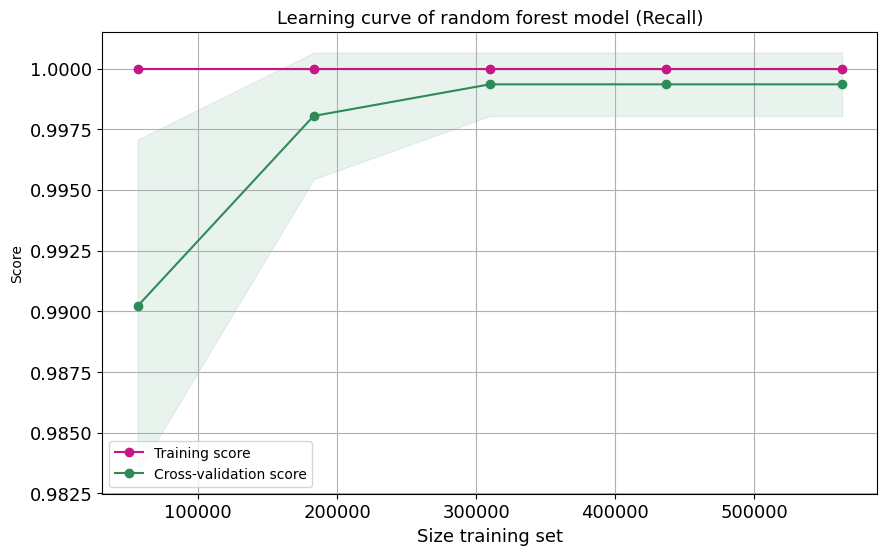

In [34]:
plt.figure(figsize=(10, 6))
plt.title("Learning curve of random forest model (Recall)",fontsize=13)
plt.xlabel("Size training set",fontsize=13)
plt.ylabel("Score")
plt.grid(True)

# Sombra para la desviación estándar de entrenamiento
plt.fill_between(
    train_sizes_rf, 
    train_scores_mean_rf - train_scores_std_rf,
    train_scores_mean_rf + train_scores_std_rf, 
    alpha=0.1, 
    color="mediumvioletred"
)

# Sombra para la desviación estándar de validación
plt.fill_between(
    train_sizes_rf, 
    validation_scores_mean_rf - validation_scores_std_rf,
    validation_scores_mean_rf + validation_scores_std_rf, 
    alpha=0.1, 
    color="seagreen"
)

# Líneas principales de puntuación
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="mediumvioletred", label="Training score")
plt.plot(train_sizes_rf, validation_scores_mean_rf, 'o-', color="seagreen", label="Cross-validation score")
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.legend(loc="best")
plt.savefig('LC_rf.png', dpi = 600)
plt.show()


### 2. XGBoost

- ¿Qué es? ¿Cómo funciona? y ¿Qué hiperparámetros utiliza?

Su nombre proviene de eXtreme Gradient Boosting, es una biblioteca de machine learning optimizada para implementar modelos basados en árboles potenciados por gradiente. Es una de las herramientas más utilizadas para resolver problemas de clasificación, especialmente en contextos donde se trabaja con un gran volumen de información.

En esencia XGBoost combina cientos (o miles) de árboles de decisión débiles en un modelo fuerte mediante un proceso iterativo donde cada nuevo árbol corrige los errores cometidos por los árboles previos.

El funcionamiento se divide en varias etapas. El proceso inicia con un modelo base, generalmente un árbol de decisión simple que realizará predicciones que inevitablemente contendrá errores, es por esto que XGBoost calcula los residuos, es decir, la diferencia entre el valor real y el valor predicho por el modelo que representará la información que le siguiente árbol deberá aprender. 

Los hiperparámetros más importantes de este modelo son 4. El más importante es "eta" que controla la magnitud con la cual cada árbol contribuye al modelo final, valores pequeños de eta aseguran menos sobreajuste con un aprendizaje lento pero seguro. Luego tenemos el hiperparámetro "n_estimators" que define el número de árboles que se añadirán, una mayor cantidad de árboles se traduce en un modelo más complejo. En tercer lugar tenemos el hiperparámetro "max_depth" que determina la profundida máxima permitida para cada árbol, si un árbol es más profundo permite capturar patrones más complejos. Por último tenemos el hiperparámetro "gamma" que indica el umbral mínimo de reducción de pérdida necesario para permitir una nueva división en un nodo, esto controla de manera indirecta el sobreajuste. 

- ¿Por qué utilizar este algoritmo?

Este modelo de aprendizaje supervisado es uno de los algoritmos más precisos para datos tabulares y es sobresaliente en su capacidad de capturar relaciones no lineales complejas. En el modelo adás se incluye una regularización integrada (L1 y L2) en su función de pérdida lo cual reduce la complejidad del modelo, previene el sobreajuste y aumenta la capacidad de generalización.

- Implementación, resultados y análisis

In [34]:
ratio = float(np.sum(ytrain == 0)) / np.sum(ytrain == 1)
recall_scorer = make_scorer(recall_score)
xgb = XGBClassifier(
    objective='binary:logistic', # Clasificación binaria
    n_estimators=300,            # Número de árboles
    learning_rate=0.05,           # Tasa de aprendizaje
    max_depth=3,                       # Profundidad de cada árbol
    gamma = 0.5  ,               
    subsample=0.8,               # Muestreo de filas
    colsample_bytree=0.8,        # Muestreo de columnas
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=ratio,      
    random_state=42
)
xgb.fit(Xtrain, ytrain)

/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [21:01:11] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [37]:
importances_xgb = xgb.feature_importances_
feature_names_xgb = x.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

     Feature  Importance
5          q    0.339722
15   neo_bin    0.200241
3          e    0.130071
0        neo    0.101194
1          H    0.097794
13       per    0.046935
11         n    0.026702
14     per_y    0.025604
4          a    0.019127
10        ad    0.012259
6          i    0.000198
12        tp    0.000105
9         ma    0.000021
8          w    0.000013
2   diameter    0.000007
7         om    0.000007


In [36]:
#Matriz de confusión y curva ROC
pred_xgb = xgb.predict(Xtest)
prob_xgb = xgb.predict_proba(Xtest)[:, 1]
cm = confusion_matrix(ytest, pred_xgb)
roc_auc_xgb = roc_auc_score(ytest, prob_xgb)
fpr, tpr, thresholds = roc_curve(ytest, prob_xgb)
roc_auc = auc(fpr, tpr)

/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:56:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


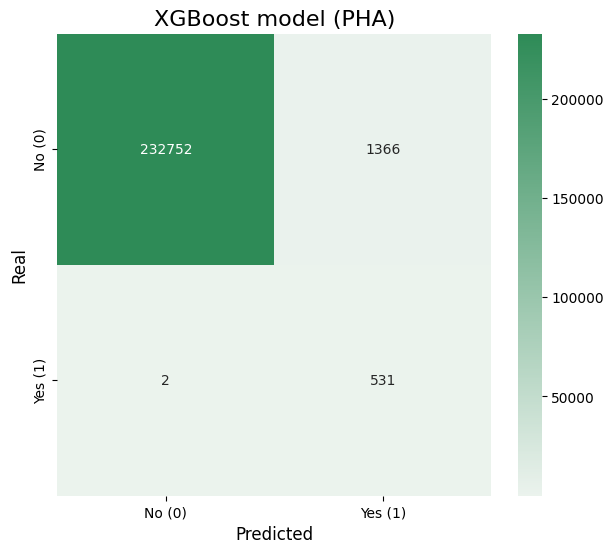

In [37]:
#Plot matriz de confusión
class_names = ['No (0)', 'Yes (1)']
plt.figure(figsize=(7, 6))
sns.heatmap(
    cm, 
    annot=True,              # Mostrar los valores numéricos
    fmt='d',                 # Formato entero (decimal)
    cmap=sns.light_palette("seagreen", as_cmap=True),            # Esquema de color
    xticklabels=class_names, 
    yticklabels=class_names
)
plt.title('XGBoost model (PHA)', fontsize=16)
plt.ylabel('Real', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.savefig('MC_xgb.png', dpi = 600)
plt.show()


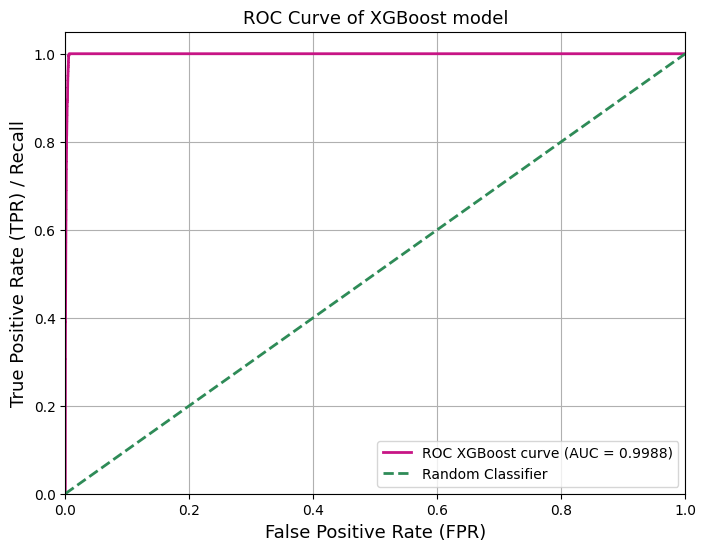

In [38]:
#Plot curva ROC
plt.figure(figsize=(8, 6))

# Trazar la Curva ROC del modelo XGBoost
plt.plot(
    fpr, tpr, color='mediumvioletred', 
    lw=2, 
    label=f'ROC XGBoost curve (AUC = {roc_auc:.4f})'
)

# Trazar la línea de referencia (Clasificador Aleatorio)
plt.plot([0, 1], [0, 1], color='seagreen', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)',fontsize=13)
plt.ylabel('True Positive Rate (TPR) / Recall',fontsize=13)
plt.title('ROC Curve of XGBoost model', fontsize=13)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('ROC_xgb.png', dpi = 600)
plt.show() 


In [39]:
param_grid = {
    'max_depth': [3, 5, 7],            # Profundidad de los árboles
    'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
    'n_estimators': [100, 200],        # Número de árboles
    'gamma': [0, 0.1]                  # Regularización (mínima reducción de pérdida requerida para hacer una partición)
}

In [40]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=xgb,  
    X=Xtrain,
    y=ytrain,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=cv, scoring=recall_scorer, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:56:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:56:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:56:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:56:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/root/venv/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [02:56:33] WARNING: /w

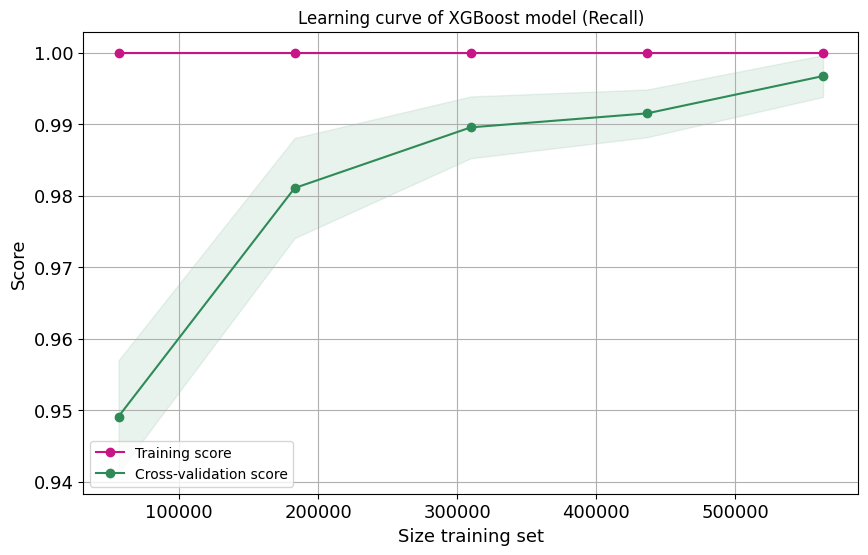

In [41]:
plt.figure(figsize=(10, 6))
plt.title("Learning curve of XGBoost model (Recall)")
plt.xlabel("Size training set", fontsize=13)
plt.ylabel("Score", fontsize=13)  
plt.grid(True)
plt.fill_between(
    train_sizes, 
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std, 
    alpha=0.1, 
    color="mediumvioletred"
)
plt.fill_between(
    train_sizes, 
    validation_scores_mean - validation_scores_std,
    validation_scores_mean + validation_scores_std, 
    alpha=0.1, 
    color="seagreen"
)
plt.plot(train_sizes, train_scores_mean, 'o-', color="mediumvioletred", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="seagreen", label="Cross-validation score")
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc="best")
plt.savefig('LC_xgb.png', dpi = 600)
plt.show()


In [48]:
xgb.feature_importances_

array([2.3636985e-01, 8.1446925e-03, 1.7945451e-04, 4.6190721e-04,
       6.7519891e-04, 1.8779494e-01, 5.2253780e-04, 4.8005790e-04,
       6.9892872e-04, 5.3922052e-04, 3.7646934e-04, 3.4028172e-04,
       4.6622302e-04, 3.3895485e-04, 2.3983636e-04, 5.6237143e-01],
      dtype=float32)

## Conclusiones

EL objetivo del proyecto fue desarrollar un modelo de clasificación binaria para identificar asteroides potencialmente peligrosos (PHA) utilizando características orbitales. Los hallazgos se centran en el desafío del desequilibrio de clases 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0127a732-d625-49f8-afd4-4a3cb61dcb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>